In [1]:
"""
Tasks:
Multiple Linear Regression
Random Forest
KNN ALgorithm
Simple linear regression
T-test
GGplot
One Way Anova
EDA Vizualization"""

'\nTasks:\nMultiple Linear Regression\nRandom Forest\nKNN ALgorithm\nSimple linear regression\nT-test\nGGplot\nOne Way Anova\nEDA Vizualization'

In [2]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Reading the csv file
datam=pd.read_csv("D:/Spyder/Data-Envelopment-Analysis-Excel/Data/factors-affecting-campus-placement/factors-affecting-campus-placement/Placement_Data_Full_Class.csv")
datam

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [4]:
datam.columns

Index(['sl_no', 'gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s',
       'degree_p', 'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p',
       'status', 'salary'],
      dtype='object')

# General Information

In [5]:
# Columns meaning
# sl_no = Serial Number
# gender = Male or Female
# ssc_p = senior sceondary percentage (10)
# ssc_b = senior secondary board
# hsc_p = higher secondary percetage (12)
# hsc_b = higher secondary board (12)
# hsc_s = higher secondary stream (12)
# degree_p = degree percentage (UG)
# degree_t = degree type (UG)
# workex = work experience
# etest_p = its a test percentage
# specialisation = the specialisation you are doing in MBA
# mba_p = MBA Percentage
# status = are you placed or not
# salary = package 

In [6]:
print("dataset size:{0}\ndataset dimension: {1}\ndataset Shape{2}".format(datam.size, datam.ndim, datam.shape))

dataset size:3225
dataset dimension: 2
dataset Shape(215, 15)


In [7]:
for i in datam:
    print("{0}={1}".format(i,datam[i].unique()))

sl_no=[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215]
gender=['M' 'F']
ssc_p=[67.   79.33 65.   56.   85.8  55.   46.   82.   73.   58.   69.6  47.
 77.   62.   63.   60.   79

#### In salary, there's a type called nan, which will hinder our process, so we will be replacing every nan by -1, where -1 means no salary

In [8]:
datam["salary"]=datam['salary'].fillna((-1)) #column.fillna((value)) to replace nan with value in that column

In [9]:
datam["salary"].unique()

array([ 2.70e+05,  2.00e+05,  2.50e+05, -1.00e+00,  4.25e+05,  2.52e+05,
        2.31e+05,  2.60e+05,  2.18e+05,  3.00e+05,  2.36e+05,  2.65e+05,
        3.93e+05,  3.60e+05,  2.40e+05,  3.50e+05,  2.78e+05,  3.20e+05,
        4.11e+05,  2.87e+05,  2.04e+05,  4.50e+05,  2.16e+05,  2.20e+05,
        2.68e+05,  2.75e+05,  3.36e+05,  2.30e+05,  5.00e+05,  4.00e+05,
        2.10e+05,  4.20e+05,  3.80e+05,  2.80e+05,  2.76e+05,  9.40e+05,
        2.25e+05,  2.33e+05,  6.90e+05,  3.40e+05,  2.55e+05,  2.85e+05,
        2.90e+05,  6.50e+05,  2.64e+05,  2.95e+05])

# General exploration

Text(0.5, 1.0, 'Serial Number Histogram')

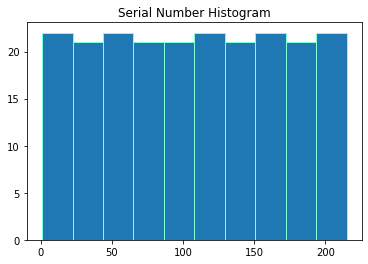

In [10]:
plt.hist(datam["sl_no"], edgecolor="#7FFFD4")
plt.title("Serial Number Histogram")

Text(0.5, 1.0, 'Gender Countplot')

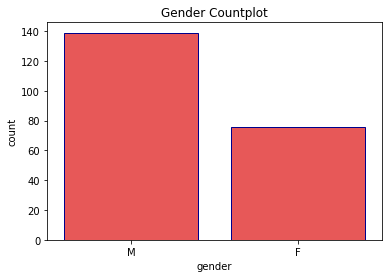

In [30]:
sns.countplot(datam['gender'], color="#FF4040", edgecolor="#00008B")
plt.title("Gender Countplot")

Text(0.5, 1.0, 'Senior Seconday Percentage Histogram')

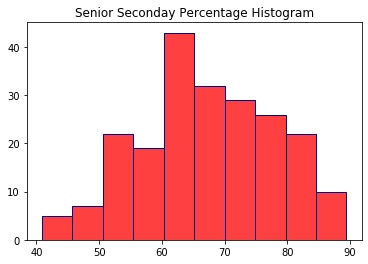

In [11]:
plt.hist(datam["ssc_p"], color="#FF4040", edgecolor="#00008B")
plt.title("Senior Seconday Percentage Histogram")

Text(0.5, 1.0, 'Senior Seconday Board Countplot')

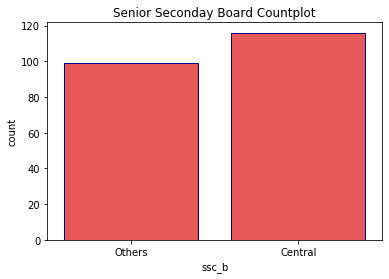

In [27]:
sns.countplot(datam["ssc_b"], color="#FF4040", edgecolor="#00008B")
plt.title("Senior Seconday Board Countplot")

Text(0.5, 1.0, 'Higher Seconday Percentage Histogram')

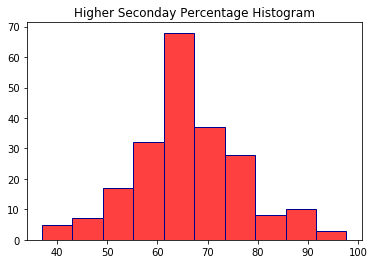

In [15]:
plt.hist(datam["hsc_p"], color="#FF4040", edgecolor="#00008B")
plt.title("Higher Seconday Percentage Histogram")

Text(0.5, 1.0, 'Higher Seconday Board Countplot')

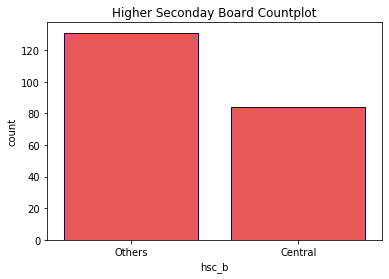

In [26]:
sns.countplot(datam["hsc_b"], color="#FF4040", edgecolor="#00008B")
plt.title("Higher Seconday Board Countplot")

Text(0.5, 1.0, 'Higher Seconday Stream Countplot')

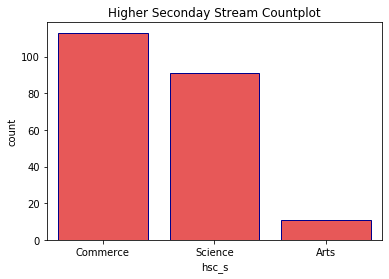

In [28]:
sns.countplot(datam["hsc_s"], color="#FF4040", edgecolor="#00008B")
plt.title("Higher Seconday Stream Countplot")

Text(0.5, 1.0, 'Higher Seconday Stream Histogram')

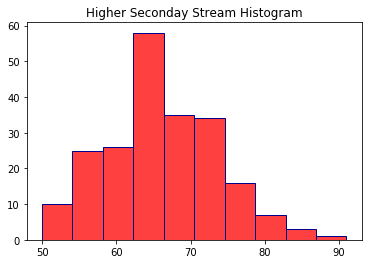

In [18]:
plt.hist(datam["degree_p"], color="#FF4040", edgecolor="#00008B")
plt.title("Degree percentage Histogram")

Text(0.5, 1.0, 'Degree Type countplot')

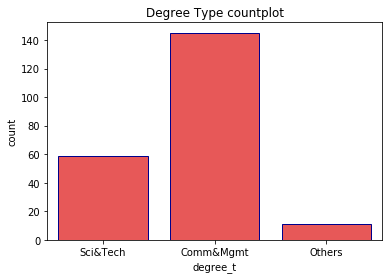

In [29]:
sns.countplot(datam["degree_t"], color="#FF4040", edgecolor="#00008B")
plt.title("Degree Type countplot")

In [33]:
#Let's make a heat map to get how 1 column is related to the other column
#For heatmap, since we dont need serial number column
#We will be creating a new dataset for heatmap
datam0=datam.copy(deep=True)
datam0=datam0.drop(['sl_no'], axis=1)
datam0

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,-1.0
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [36]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [37]:
datam0['gender'] = le.fit_transform(datam0['gender'])
datam0['ssc_b'] = le.fit_transform(datam0['ssc_b'])
datam0['workex'] = le.fit_transform(datam0['workex'])
datam0['specialisation'] = le.fit_transform(datam0['specialisation'])
datam0['status'] = le.fit_transform(datam0['status'])
datam0['hsc_b'] = le.fit_transform(datam0['hsc_b'])
datam0['hsc_s'] = le.fit_transform(datam0['hsc_s'])
datam0['degree_t'] = le.fit_transform(datam0['degree_t'])

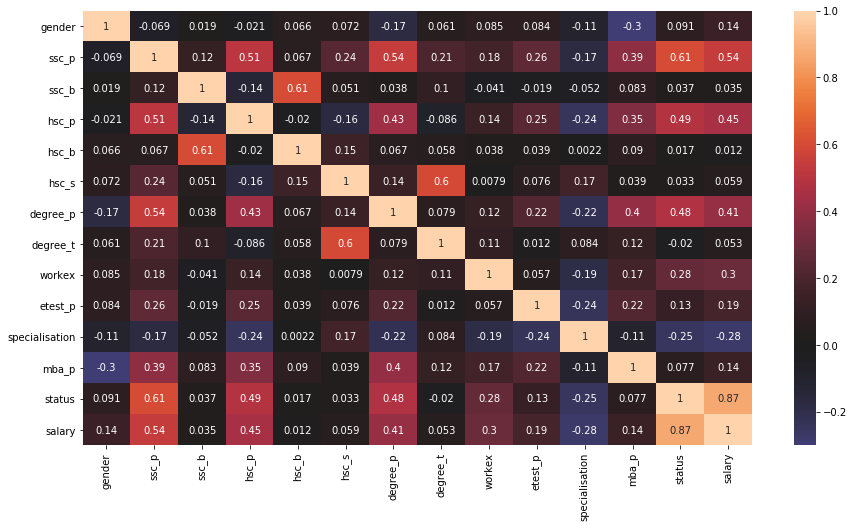

In [41]:
fig,ax=plt.subplots(figsize=(15,8))
sns.heatmap(datam0.corr(), center=0, annot = True)